In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [14]:
# Constants
h_actual = 6.626e-34  # Planck's constant (Joule-second)
e = 1.602e-19  # Elementary charge (C)
W_actual = 4.5 * e  # Work function of the metal (J)

In [15]:
# 1. Generate Experimental Data (Refined Setup)
frequencies = np.linspace(4.5e14, 9.5e14, 50)  # Increased number of data points (Hz)
K_actual = h_actual * frequencies - W_actual  # Actual kinetic energy (J)
K_actual[K_actual < 0] = 0  # No emission below the work function
noise = np.random.normal(0, 0.05 * e, len(K_actual))  # Reduced noise in Joules
K_experiment = K_actual + noise

In [16]:
# 2. Pencarian Akar Persamaan (Finding the Threshold Frequency)
# The threshold frequency (f_threshold) satisfies h*f_threshold = W_actual
f_threshold = W_actual / h_actual

In [17]:
# 3. Interpolasi dan Pencocokan Kurva (Curve Fitting)
def photoelectric_model(f, h, W):
    return h * f - W

In [18]:
# Fit the experimental data
params, covariance = curve_fit(photoelectric_model, frequencies, K_experiment)
h_fit, W_fit = params

In [19]:
# 4. Diferensial dan Integral Numerik (Calculate Errors)
# Calculate percentage errors
h_error = abs(h_fit - h_actual) / h_actual * 100  # Error for Planck's constant
W_error = abs(W_fit - W_actual) / W_actual * 100  # Error for work function

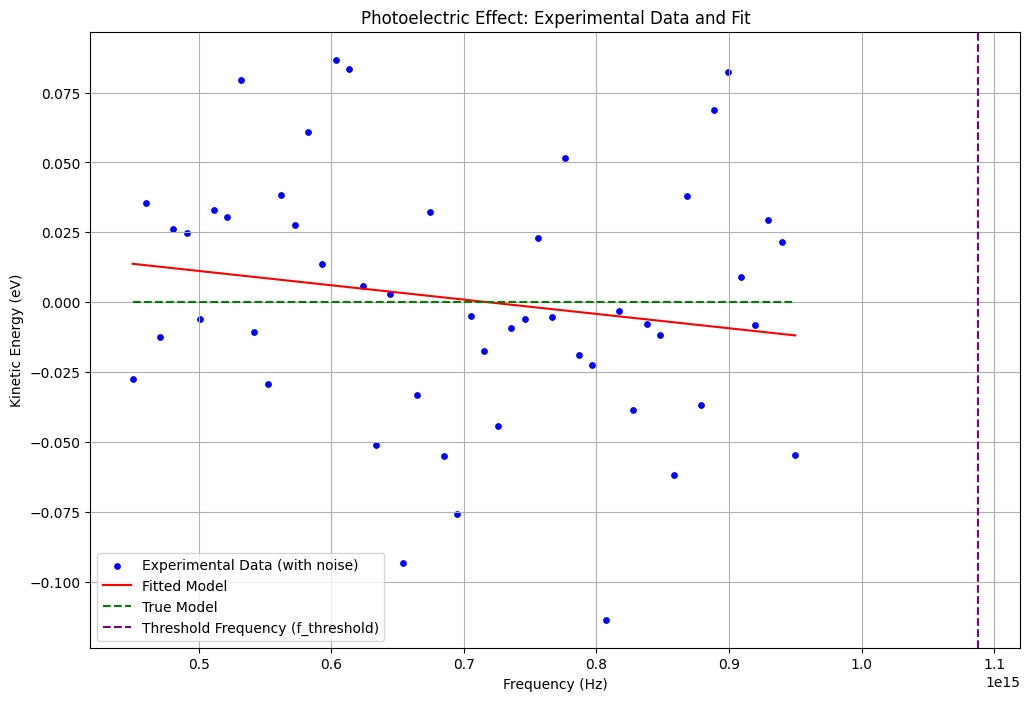

In [20]:
# Plot the Results
plt.figure(figsize=(12, 8))
plt.scatter(frequencies, K_experiment / e, color='blue', label='Experimental Data (with noise)', s=15)
plt.plot(frequencies, photoelectric_model(frequencies, h_fit, W_fit) / e, color='red', label='Fitted Model')
plt.plot(frequencies, K_actual / e, '--', color='green', label='True Model')
plt.axvline(f_threshold, color='purple', linestyle='--', label='Threshold Frequency (f_threshold)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Kinetic Energy (eV)')
plt.title('Photoelectric Effect: Experimental Data and Fit')
plt.legend()
plt.grid()
plt.show()

In [21]:
# Return refined results
f_threshold, h_fit, W_fit, h_error, W_error

(1087986718985813.4,
 -8.21183329291853e-36,
 -5.894657797770678e-21,
 101.23933493705381,
 100.81768037144829)